# Indian Premier League
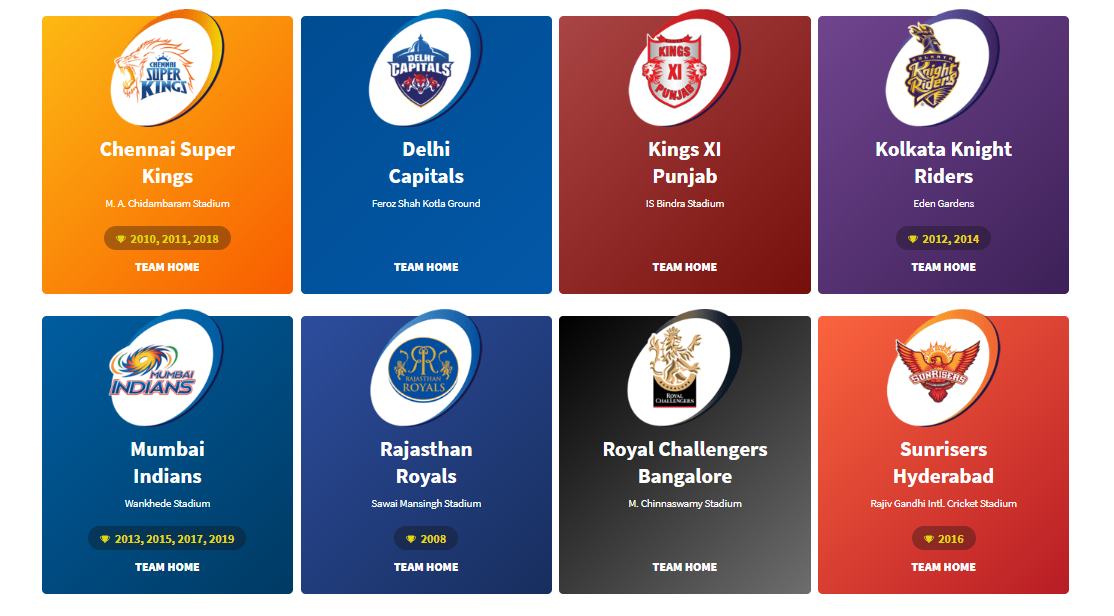
**Introduction:** Indian Premier League (better known as IPL) is a short format (T-20) Mens Cricket tournament that is hosted in India. It is currently presided over by the Board of Cricket Control of India (BCCI). The Tournament comprises of 8 teams who complete with each other in a league format, which is followed by a knockout Stage. Some of the Teams who Played previously are no more in action (For e.g. Deccan Chargers, Kochi Tuskers, Gujrat Lions, Pune Warriors etc). Two teams have been banned for two seasons, but have been a part of the tournament for the rest. Just a note, the data available over her is from 2008-2019, and all the data findings have been as per the data.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns # Provides a high level interface for drawing attractive and informative statistical graphics
import plotly.express as px
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn import metrics
import pickle
sns.set()
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

C:\Users\91961\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
matches_data = pd.read_csv("matches.csv",parse_dates=["date"])
matches_data.head()

id  season       city       date                        team1  \
0   1    2017  Hyderabad 2017-04-05          Sunrisers Hyderabad   
1   2    2017       Pune 2017-04-06               Mumbai Indians   
2   3    2017     Rajkot 2017-04-07                Gujarat Lions   
3   4    2017     Indore 2017-04-08       Rising Pune Supergiant   
4   5    2017  Bangalore 2017-04-08  Royal Challengers Bangalore   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1       Rising Pune Supergiant       Rising Pune Supergiant         field   
2        Kolkata Knight Riders        Kolkata Knight Riders         field   
3              Kings XI Punjab              Kings XI Punjab         field   
4             Delhi Daredevils  Royal Challengers Bangalore           bat   

   result  dl_applied                       winner  win_by_runs  \
0  normal           0          Sunrisers Hyderabad           35   
1  normal           0       Rising Pune Supergiant            0   
2  normal           0        Kolkata Knight Riders            0   
3  normal           0              Kings XI Punjab            0   
4  normal           0  Royal Challengers Bangalore           15   

   win_by_wickets player_of_match                                      venue  \
0               0    Yuvraj Singh  Rajiv Gandhi International Stadium, Uppal   
1               7       SPD Smith    Maharashtra Cricket Association Stadium   
2              10         CA Lynn     Saurashtra Cricket Association Stadium   
3               6      GJ Maxwell                     Holkar Cricket Stadium   
4               0       KM Jadhav                      M Chinnaswamy Stadium   

          umpire1        umpire2 umpire3  
0     AY Dandekar       NJ Llong     NaN  
1  A Nand Kishore         S Ravi     NaN  
2     Nitin Menon      CK Nandan     NaN  
3    AK Chaudhary  C Shamshuddin     NaN  
4             NaN            NaN     NaN

<a id=section3></a>

## Data Profiling

<a id=section301></a>

### Understanding the Matches Dataset

In [3]:
matches_data.shape # This will print the number of rows and comlumns of the Data Frame

(756, 18)

IPL matches data has __756 rows__ and __18 columns.__

In [4]:
matches_data.columns # This will print the names of all columns.

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [5]:
matches_data.info() # This will give Index, Datatype and Memory information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               756 non-null    int64         
 1   season           756 non-null    int64         
 2   city             749 non-null    object        
 3   date             756 non-null    datetime64[ns]
 4   team1            756 non-null    object        
 5   team2            756 non-null    object        
 6   toss_winner      756 non-null    object        
 7   toss_decision    756 non-null    object        
 8   result           756 non-null    object        
 9   dl_applied       756 non-null    int64         
 10  winner           752 non-null    object        
 11  win_by_runs      756 non-null    int64         
 12  win_by_wickets   756 non-null    int64         
 13  player_of_match  752 non-null    object        
 14  venue            756 non-null    object   

In [6]:
matches_data.describe()

id       season  dl_applied  win_by_runs  win_by_wickets
count    756.000000   756.000000  756.000000   756.000000      756.000000
mean    1792.178571  2013.444444    0.025132    13.283069        3.350529
std     3464.478148     3.366895    0.156630    23.471144        3.387963
min        1.000000  2008.000000    0.000000     0.000000        0.000000
25%      189.750000  2011.000000    0.000000     0.000000        0.000000
50%      378.500000  2013.000000    0.000000     0.000000        4.000000
75%      567.250000  2016.000000    0.000000    19.000000        6.000000
max    11415.000000  2019.000000    1.000000   146.000000       10.000000

In [7]:
matches_data.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

From the above output we can see that __city__ and __umpire3__ columns contains __maximum null values__. We will see how to deal with them.

<a id=section302></a>

In [8]:
matches_data["city"].unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah', nan,
       'Mohali', 'Bengaluru'], dtype=object)

In [9]:
matches_data["team1"].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

### Preprocessing

- Dealing with missing values<br/>
    - Replacing missing entries of __City__ from the Venue Column.
    - Replacing  __Rising Pune supergiant as Rising Pune supergiants__
    - Dropping the column __'Umpire3'__ as it has too many _null_ values.
    - Replace city __Bengaluru to Bangalore__

Drop umpire3 column as it has __637__ missing values

In [10]:
matches_data.drop('umpire3', axis=1, inplace=True)  
matches_data.columns.unique()

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2'],
      dtype='object')

Rising Pune Supergiants is having 2 teams with different names (Rising Pune Supergiants and Rising Pune Supergiant)  replacing all values with same name Rising Pune Supergiants

In [11]:
#Replacing Rising Pune Supergiant with Rising Pune Supergiants
matches_data.replace('Rising Pune Supergiant','Rising Pune Supergiants',inplace = True)
matches_data.head(2)

id  season       city       date                team1  \
0   1    2017  Hyderabad 2017-04-05  Sunrisers Hyderabad   
1   2    2017       Pune 2017-04-06       Mumbai Indians   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1      Rising Pune Supergiants      Rising Pune Supergiants         field   

   result  dl_applied                   winner  win_by_runs  win_by_wickets  \
0  normal           0      Sunrisers Hyderabad           35               0   
1  normal           0  Rising Pune Supergiants            0               7   

  player_of_match                                      venue         umpire1  \
0    Yuvraj Singh  Rajiv Gandhi International Stadium, Uppal     AY Dandekar   
1       SPD Smith    Maharashtra Cricket Association Stadium  A Nand Kishore   

    umpire2  
0  NJ Llong  
1    S Ravi

Delhi Daredevils is having 2 teams with different names (Delhi Dardevils and Delhi Capitals)  replacing all values with same name Delhi Capitals

In [12]:
#Replacing Delhi Daredevils with Delhi Capitals
matches_data.replace('Delhi Daredevils','Delhi Capitals',inplace = True)
matches_data.head()

id  season       city       date                        team1  \
0   1    2017  Hyderabad 2017-04-05          Sunrisers Hyderabad   
1   2    2017       Pune 2017-04-06               Mumbai Indians   
2   3    2017     Rajkot 2017-04-07                Gujarat Lions   
3   4    2017     Indore 2017-04-08      Rising Pune Supergiants   
4   5    2017  Bangalore 2017-04-08  Royal Challengers Bangalore   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1      Rising Pune Supergiants      Rising Pune Supergiants         field   
2        Kolkata Knight Riders        Kolkata Knight Riders         field   
3              Kings XI Punjab              Kings XI Punjab         field   
4               Delhi Capitals  Royal Challengers Bangalore           bat   

   result  dl_applied                       winner  win_by_runs  \
0  normal           0          Sunrisers Hyderabad           35   
1  normal           0      Rising Pune Supergiants            0   
2  normal           0        Kolkata Knight Riders            0   
3  normal           0              Kings XI Punjab            0   
4  normal           0  Royal Challengers Bangalore           15   

   win_by_wickets player_of_match                                      venue  \
0               0    Yuvraj Singh  Rajiv Gandhi International Stadium, Uppal   
1               7       SPD Smith    Maharashtra Cricket Association Stadium   
2              10         CA Lynn     Saurashtra Cricket Association Stadium   
3               6      GJ Maxwell                     Holkar Cricket Stadium   
4               0       KM Jadhav                      M Chinnaswamy Stadium   

          umpire1        umpire2  
0     AY Dandekar       NJ Llong  
1  A Nand Kishore         S Ravi  
2     Nitin Menon      CK Nandan  
3    AK Chaudhary  C Shamshuddin  
4             NaN            NaN

### Replacing Null values in CITY column from VENUE

In [13]:
matches_data.loc[matches_data["city"].isnull()]

id  season city       date                        team1  \
461  462    2014  NaN 2014-04-19               Mumbai Indians   
462  463    2014  NaN 2014-04-19        Kolkata Knight Riders   
466  467    2014  NaN 2014-04-23          Chennai Super Kings   
468  469    2014  NaN 2014-04-25          Sunrisers Hyderabad   
469  470    2014  NaN 2014-04-25               Mumbai Indians   
474  475    2014  NaN 2014-04-28  Royal Challengers Bangalore   
476  477    2014  NaN 2014-04-30          Sunrisers Hyderabad   

                           team2                  toss_winner toss_decision  \
461  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
462               Delhi Capitals        Kolkata Knight Riders           bat   
466             Rajasthan Royals             Rajasthan Royals         field   
468               Delhi Capitals          Sunrisers Hyderabad           bat   
469          Chennai Super Kings               Mumbai Indians           bat   
474              Kings XI Punjab              Kings XI Punjab         field   
476               Mumbai Indians               Mumbai Indians         field   

     result  dl_applied                       winner  win_by_runs  \
461  normal           0  Royal Challengers Bangalore            0   
462  normal           0               Delhi Capitals            0   
466  normal           0          Chennai Super Kings            7   
468  normal           0          Sunrisers Hyderabad            4   
469  normal           0          Chennai Super Kings            0   
474  normal           0              Kings XI Punjab            0   
476  normal           0          Sunrisers Hyderabad           15   

     win_by_wickets player_of_match                                venue  \
461               7        PA Patel  Dubai International Cricket Stadium   
462               4       JP Duminy  Dubai International Cricket Stadium   
466               0       RA Jadeja  Dubai International Cricket Stadium   
468               0        AJ Finch  Dubai International Cricket Stadium   
469               7       MM Sharma  Dubai International Cricket Stadium   
474               5  Sandeep Sharma  Dubai International Cricket Stadium   
476               0         B Kumar  Dubai International Cricket Stadium   

             umpire1         umpire2  
461        Aleem Dar    AK Chaudhary  
462        Aleem Dar     VA Kulkarni  
466  HDPK Dharmasena  RK Illingworth  
468        M Erasmus          S Ravi  
469        BF Bowden       M Erasmus  
474        BF Bowden          S Ravi  
476  HDPK Dharmasena       M Erasmus

In [14]:
matches_data['city'].fillna( matches_data['venue'].apply(lambda x: x[:5]),inplace = True)
matches_data[matches_data['city']== 'Dubai']

id  season   city       date                        team1  \
461  462    2014  Dubai 2014-04-19               Mumbai Indians   
462  463    2014  Dubai 2014-04-19        Kolkata Knight Riders   
466  467    2014  Dubai 2014-04-23          Chennai Super Kings   
468  469    2014  Dubai 2014-04-25          Sunrisers Hyderabad   
469  470    2014  Dubai 2014-04-25               Mumbai Indians   
474  475    2014  Dubai 2014-04-28  Royal Challengers Bangalore   
476  477    2014  Dubai 2014-04-30          Sunrisers Hyderabad   

                           team2                  toss_winner toss_decision  \
461  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
462               Delhi Capitals        Kolkata Knight Riders           bat   
466             Rajasthan Royals             Rajasthan Royals         field   
468               Delhi Capitals          Sunrisers Hyderabad           bat   
469          Chennai Super Kings               Mumbai Indians           bat   
474              Kings XI Punjab              Kings XI Punjab         field   
476               Mumbai Indians               Mumbai Indians         field   

     result  dl_applied                       winner  win_by_runs  \
461  normal           0  Royal Challengers Bangalore            0   
462  normal           0               Delhi Capitals            0   
466  normal           0          Chennai Super Kings            7   
468  normal           0          Sunrisers Hyderabad            4   
469  normal           0          Chennai Super Kings            0   
474  normal           0              Kings XI Punjab            0   
476  normal           0          Sunrisers Hyderabad           15   

     win_by_wickets player_of_match                                venue  \
461               7        PA Patel  Dubai International Cricket Stadium   
462               4       JP Duminy  Dubai International Cricket Stadium   
466               0       RA Jadeja  Dubai International Cricket Stadium   
468               0        AJ Finch  Dubai International Cricket Stadium   
469               7       MM Sharma  Dubai International Cricket Stadium   
474               5  Sandeep Sharma  Dubai International Cricket Stadium   
476               0         B Kumar  Dubai International Cricket Stadium   

             umpire1         umpire2  
461        Aleem Dar    AK Chaudhary  
462        Aleem Dar     VA Kulkarni  
466  HDPK Dharmasena  RK Illingworth  
468        M Erasmus          S Ravi  
469        BF Bowden       M Erasmus  
474        BF Bowden          S Ravi  
476  HDPK Dharmasena       M Erasmus

### Missing values of winner and player_of_match columns.

In [15]:
matches_data[matches_data['winner'].isnull()]

id  season       city       date                        team1  \
300    301    2011      Delhi 2011-05-21               Delhi Capitals   
545    546    2015  Bangalore 2015-04-29  Royal Challengers Bangalore   
570    571    2015  Bangalore 2015-05-17               Delhi Capitals   
744  11340    2019  Bengaluru 2019-04-30  Royal Challengers Bangalore   

                           team2                  toss_winner toss_decision  \
300                Pune Warriors               Delhi Capitals           bat   
545             Rajasthan Royals             Rajasthan Royals         field   
570  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
744             Rajasthan Royals             Rajasthan Royals         field   

        result  dl_applied winner  win_by_runs  win_by_wickets  \
300  no result           0    NaN            0               0   
545  no result           0    NaN            0               0   
570  no result           0    NaN            0               0   
744  no result           0    NaN            0               0   

    player_of_match                   venue          umpire1       umpire2  
300             NaN        Feroz Shah Kotla        SS Hazare     RJ Tucker  
545             NaN   M Chinnaswamy Stadium        JD Cloete     PG Pathak  
570             NaN   M Chinnaswamy Stadium  HDPK Dharmasena  K Srinivasan  
744             NaN  M. Chinnaswamy Stadium      Nigel Llong  Ulhas Gandhe

In [16]:
matches_data['winner'].fillna(matches_data['result'], inplace = True)
matches_data['player_of_match'].fillna(matches_data['result'], inplace = True)

### Replace city Bengaluru to Bangalore

In [17]:
matches_data.replace( 'Bengaluru', 'Bangalore',inplace = True)
matches_data['city'].unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah',
       'Dubai', 'Mohali'], dtype=object)

In [18]:
matches_data.isnull().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            2
umpire2            2
dtype: int64

In [19]:
matches_data.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2'],
      dtype='object')

In [20]:
columns_to_remove=["city","result","dl_applied","player_of_match","umpire1","umpire2"]

In [21]:
matches_data.drop(labels=columns_to_remove,axis=1,inplace=True)

In [22]:
matches_data.head()

id  season       date                        team1  \
0   1    2017 2017-04-05          Sunrisers Hyderabad   
1   2    2017 2017-04-06               Mumbai Indians   
2   3    2017 2017-04-07                Gujarat Lions   
3   4    2017 2017-04-08      Rising Pune Supergiants   
4   5    2017 2017-04-08  Royal Challengers Bangalore   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1      Rising Pune Supergiants      Rising Pune Supergiants         field   
2        Kolkata Knight Riders        Kolkata Knight Riders         field   
3              Kings XI Punjab              Kings XI Punjab         field   
4               Delhi Capitals  Royal Challengers Bangalore           bat   

                        winner  win_by_runs  win_by_wickets  \
0          Sunrisers Hyderabad           35               0   
1      Rising Pune Supergiants            0               7   
2        Kolkata Knight Riders            0              10   
3              Kings XI Punjab            0               6   
4  Royal Challengers Bangalore           15               0   

                                       venue  
0  Rajiv Gandhi International Stadium, Uppal  
1    Maharashtra Cricket Association Stadium  
2     Saurashtra Cricket Association Stadium  
3                     Holkar Cricket Stadium  
4                      M Chinnaswamy Stadium

### Exploratory Data Analysis

#### Number of Matches held each season

Text(0, 0.5, 'No. of Matches')

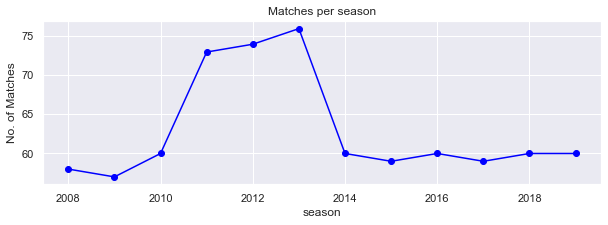

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax = matches_data.groupby("season")["id"].count().plot(kind="line",title="Matches per season", marker='o',color=['blue'],figsize=(10,3)) 
plt.ylabel("No. of Matches")

Most Number of Matches were held in __Season 2013__ i.e 76 Matches

#### Number of matches won by each team in each season

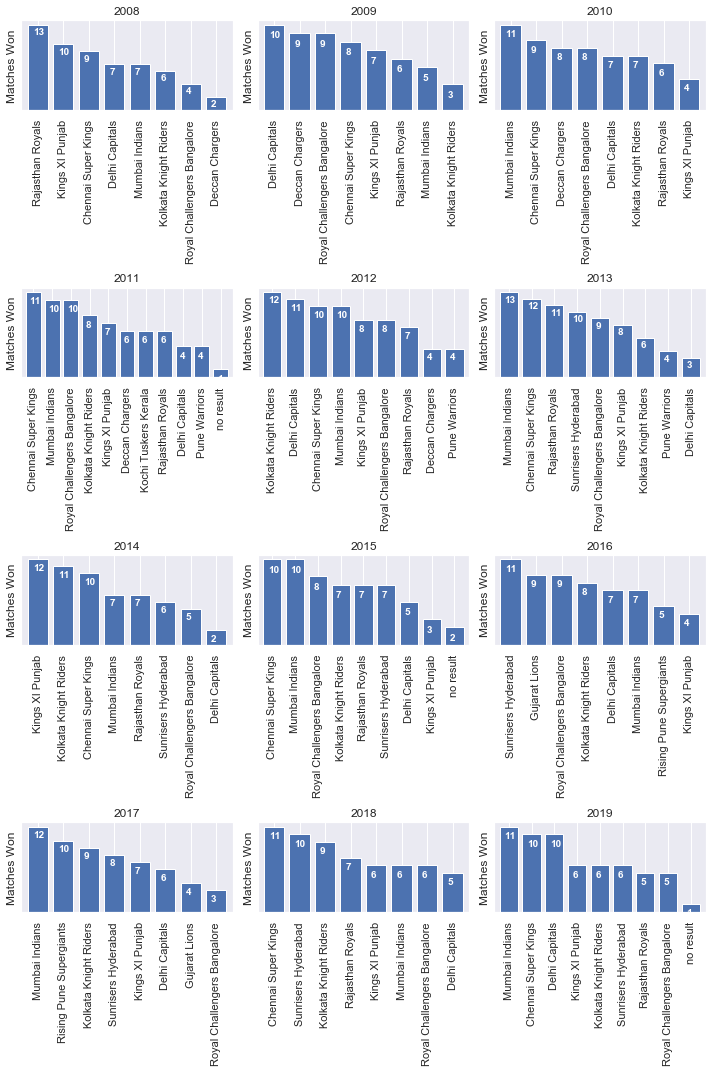

In [24]:
max_winner = matches_data.groupby('season')['winner'].value_counts()

count = 1
fig = plt.figure()

groups = max_winner.groupby('season')
for year,group in groups:
    ax = fig.add_subplot(4,3,count)
    ax.set_title(year)
    ax=group[year].plot(kind="bar",figsize=(10,15),width=0.8)
    count=count+1
    plt.xlabel('')
    plt.yticks([])
    plt.ylabel('Matches Won')
    
    totals = []
    for i in ax.patches:
        totals.append(i.get_height())
    total = sum(totals)
    for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
        ax.text(i.get_x()+0.2, i.get_height()-1.5,s= i.get_height(),color="white",fontweight='bold')
        
plt.tight_layout()
plt.show()

__Mumbai Indians__ and __Chennai Super Kings__ have won most matches

#### Success Rate of Each Team

In [25]:
def annot_plot(ax,w,h):                                    # function to add data to plot
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    for p in ax.patches:
        ax.annotate('{0:.1f}'.format(p.get_height()), (p.get_x()+w, p.get_height()+h))

Chennai Super Kings            60.975610
Deccan Chargers                38.666667
Delhi Capitals                 43.502825
Gujarat Lions                  43.333333
Kings XI Punjab                46.590909
Kochi Tuskers Kerala           42.857143
Kolkata Knight Riders          51.685393
Mumbai Indians                 58.288770
Pune Warriors                  26.086957
Rajasthan Royals               51.020408
Rising Pune Supergiants        50.000000
Royal Challengers Bangalore    46.666667
Sunrisers Hyderabad            53.703704
no result                            NaN
dtype: float64


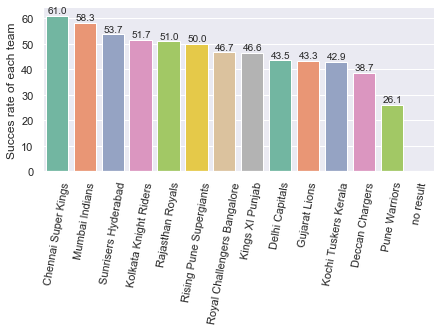

In [26]:
matches_won = matches_data.groupby('winner').count()
matches_won
total_matches = matches_data['team1'].value_counts()+ matches_data['team2'].value_counts()
total_matches
match_succes_rate = (matches_won["id"]/total_matches)*100
print(match_succes_rate)
data = match_succes_rate.sort_values(ascending = False)
plt.figure(figsize=(7,3))
ax = sns.barplot(x = data.index, y = data, palette="Set2");
plt.ylabel('Succes rate of each team')
plt.xticks(rotation=80)
annot_plot(ax,0.08,1)

 __Chennai Super Kings__ have highest winning success rate __(61.0%)__ , followed by Mumbai Indians __(58.3%)__.

#### Best Defending Teams

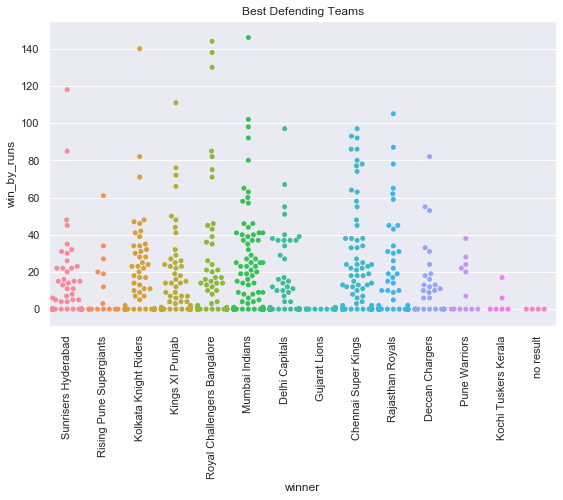

In [27]:
plt.figure(figsize=(8,5))
sns.swarmplot(y='win_by_runs',x='winner',data=matches_data)
plt.tight_layout()
plt.xticks(rotation=90)
plt.title('Best Defending Teams')
plt.show()

__Mumbai Indians, Royal Challengers Bangalore and Chennai Super kings__ are best Defending teams.

#### Best Chasing Teams

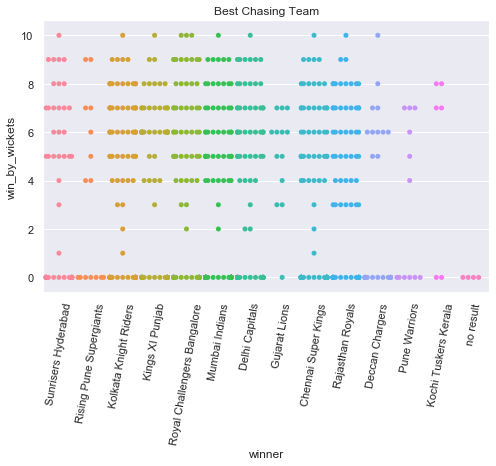

In [28]:
plt.figure(figsize=(8,5))
sns.swarmplot(y='win_by_wickets',x='winner',data=matches_data)
plt.xticks(rotation=80)
plt.title('Best Chasing Team')
plt.show()

#### How toss Winning affects the Match Winner

In [29]:
tosswin_win = matches_data['id'][matches_data['toss_winner'] == matches_data['winner']].count()
total_matches=matches_data['id'].count()
Success_rate = ((matches_data[matches_data['toss_winner'] == matches_data['winner']].count())/(total_matches))*100

print("Number of matches in which Toss winner is the game winner is :",tosswin_win, "out of",total_matches," ie.,", Success_rate["id"],"%" )

Number of matches in which Toss winner is the game winner is : 393 out of 756  ie., 51.98412698412699 %


#### Toss Decision  in which Toss winner is the game winner

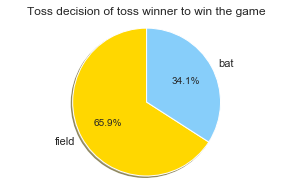

In [30]:
tosswin_winner = matches_data['toss_decision'][matches_data['toss_winner'] == matches_data['winner']].value_counts()
labels=np.array(tosswin_winner.index)
sizes = tosswin_winner.values
colors = ['gold', 'lightskyblue']

plt.figure(figsize=(5,3))
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True,startangle=90)

plt.title('Toss decision of toss winner to win the game')
plt.axis('equal')
plt.show()

__65.9%__ of the toss winning teams had decided to __field__ first while __34.1%__ had decided to __Bat__ first and won the matches.

#### Best Venue for Batting or Fielding

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]),
 <a list of 41 Text xticklabel objects>)

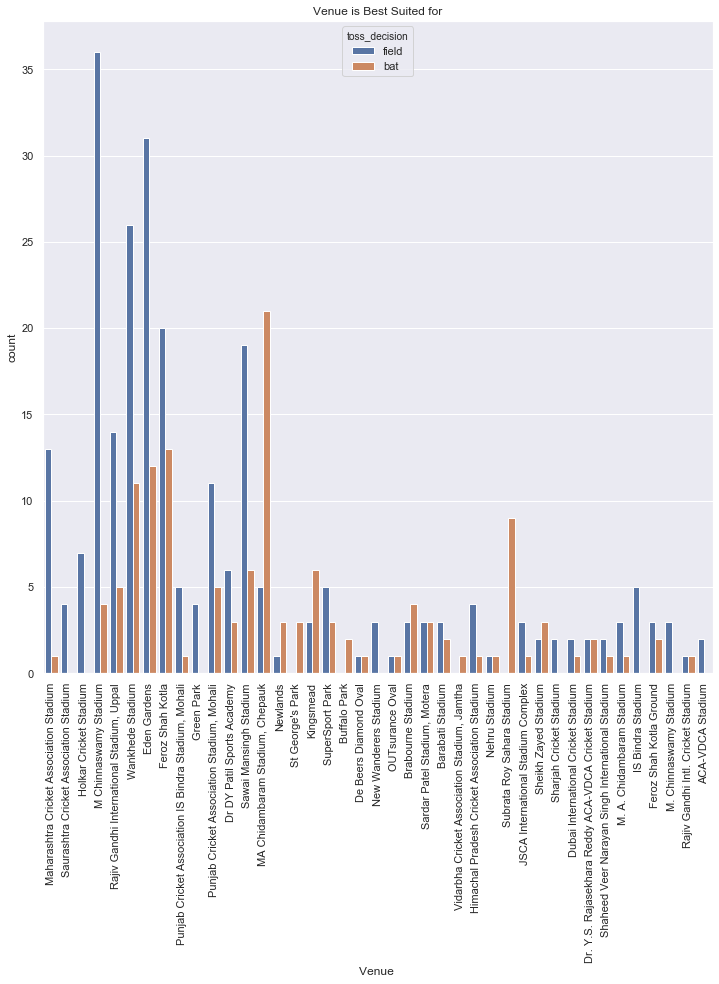

In [31]:
mpl.rcParams["figure.figsize"]=(12,12)
venue_suit_for =matches_data[matches_data['toss_winner'] == matches_data['winner']]
sns.countplot(x='venue',hue='toss_decision',data=venue_suit_for)
plt.xlabel('Venue ')
plt.title('Venue is Best Suited for')
plt.xticks(rotation=90)

__M Chinnaswamy stadium and Eden Gardens__ is best Suited for Feilding and __MA Chidambaram Stadium ,Chepauk__ is best suited for Batting.

In [32]:
a=636
for i in range(7894,11416):
    if i in matches_data[matches_data["id"]>636]["id"].unique():
        a=a+1
    matches_data["id"].replace(i,a,inplace=True)

In [33]:
matches_data.drop(labels=["team1","team2"],axis=1,inplace=True)

In [34]:
matches_data=matches_data.rename(columns={"id":"match_id"})

In [35]:
matches_data.head()

match_id  season       date                  toss_winner toss_decision  \
0         1    2017 2017-04-05  Royal Challengers Bangalore         field   
1         2    2017 2017-04-06      Rising Pune Supergiants         field   
2         3    2017 2017-04-07        Kolkata Knight Riders         field   
3         4    2017 2017-04-08              Kings XI Punjab         field   
4         5    2017 2017-04-08  Royal Challengers Bangalore           bat   

                        winner  win_by_runs  win_by_wickets  \
0          Sunrisers Hyderabad           35               0   
1      Rising Pune Supergiants            0               7   
2        Kolkata Knight Riders            0              10   
3              Kings XI Punjab            0               6   
4  Royal Challengers Bangalore           15               0   

                                       venue  
0  Rajiv Gandhi International Stadium, Uppal  
1    Maharashtra Cricket Association Stadium  
2     Saurashtra Cricket Association Stadium  
3                     Holkar Cricket Stadium  
4                      M Chinnaswamy Stadium

### Understanding the Deliveries Dataset

In [36]:
deliveries_data=pd.read_csv("deliveries.csv")
deliveries_data.head()

match_id  inning         batting_team                 bowling_team  over  \
0         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
1         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
2         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
3         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
4         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   

   ball    batsman non_striker    bowler  is_super_over  ...  bye_runs  \
0     1  DA Warner    S Dhawan  TS Mills              0  ...         0   
1     2  DA Warner    S Dhawan  TS Mills              0  ...         0   
2     3  DA Warner    S Dhawan  TS Mills              0  ...         0   
3     4  DA Warner    S Dhawan  TS Mills              0  ...         0   
4     5  DA Warner    S Dhawan  TS Mills              0  ...         0   

   legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
0            0            0             0             0           0   
1            0            0             0             0           0   
2            0            0             0             4           0   
3            0            0             0             0           0   
4            0            0             0             0           2   

   total_runs  player_dismissed dismissal_kind fielder  
0           0               NaN            NaN     NaN  
1           0               NaN            NaN     NaN  
2           4               NaN            NaN     NaN  
3           0               NaN            NaN     NaN  
4           2               NaN            NaN     NaN  

[5 rows x 21 columns]

In [37]:
deliveries_data.shape

(179078, 21)

In [38]:
deliveries_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [39]:
deliveries_data.describe()

match_id         inning           over           ball  \
count  179078.000000  179078.000000  179078.000000  179078.000000   
mean     1802.252957       1.482952      10.162488       3.615587   
std      3472.322805       0.502074       5.677684       1.806966   
min         1.000000       1.000000       1.000000       1.000000   
25%       190.000000       1.000000       5.000000       2.000000   
50%       379.000000       1.000000      10.000000       4.000000   
75%       567.000000       2.000000      15.000000       5.000000   
max     11415.000000       5.000000      20.000000       9.000000   

       is_super_over      wide_runs       bye_runs    legbye_runs  \
count  179078.000000  179078.000000  179078.000000  179078.000000   
mean        0.000452       0.036721       0.004936       0.021136   
std         0.021263       0.251161       0.116480       0.194908   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       5.000000       4.000000       5.000000   

         noball_runs   penalty_runs   batsman_runs     extra_runs  \
count  179078.000000  179078.000000  179078.000000  179078.000000   
mean        0.004183       0.000056       1.246864       0.067032   
std         0.070492       0.016709       1.608270       0.342553   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       1.000000       0.000000   
75%         0.000000       0.000000       1.000000       0.000000   
max         5.000000       5.000000       7.000000       7.000000   

          total_runs  
count  179078.000000  
mean        1.313897  
std         1.605422  
min         0.000000  
25%         0.000000  
50%         1.000000  
75%         1.000000  
max        10.000000

In [40]:
deliveries_data.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

### Exploratory Data Analysis

#### Top 10 Batsman

In [41]:
batting=deliveries_data.groupby('batsman').apply(lambda x:np.sum(x['batsman_runs'])).reset_index(name='Runs')
batting_sorted=batting.sort_values(by='Runs',ascending=False)
top_batsmen=batting_sorted[:10] 
print('Top 10 Batsmen :\n',top_batsmen)
fig = px.bar(top_batsmen, x='batsman', y='Runs',
             hover_data=['batsman'], color='Runs',title='Top 10 Batsmen in IPL- Seasons 2008-2019')
fig.show()

Top 10 Batsmen :
             batsman  Runs
486         V Kohli  5434
428        SK Raina  5415
367       RG Sharma  4914
112       DA Warner  4741
392        S Dhawan  4632
92         CH Gayle  4560
290        MS Dhoni  4477
384      RV Uthappa  4446
26   AB de Villiers  4428
147       G Gambhir  4223


#### Top 10 Bowlers

In [42]:
bowling_wickets=deliveries_data[deliveries_data['dismissal_kind']!='run out']
bowling=bowling_wickets.groupby('bowler').apply(lambda x:x['dismissal_kind'].dropna()).reset_index(name='Wickets')
bowling_wicket_count=bowling.groupby('bowler').count().reset_index()
bowling_top=bowling_wicket_count.sort_values(by='Wickets',ascending=False)
top_bowlers=bowling_top.loc[:,['bowler','Wickets']][0:10] 
print('The Top Wicket Takers in the Tournament are:\n',top_bowlers)
fig = px.bar(top_bowlers, x='bowler', y='Wickets',
             hover_data=['bowler'], color='Wickets',title='Top 10 Bowlers in IPL- Seasons 2008-2019')
fig.show()

The Top Wicket Takers in the Tournament are:
               bowler  Wickets
290       SL Malinga      170
6           A Mishra      156
110  Harbhajan Singh      150
227        PP Chawla      149
82          DJ Bravo      147
46           B Kumar      133
232         R Ashwin      125
296        SP Narine      122
326         UT Yadav      119
244        RA Jadeja      108


#### Score of Batsman across all Seasons

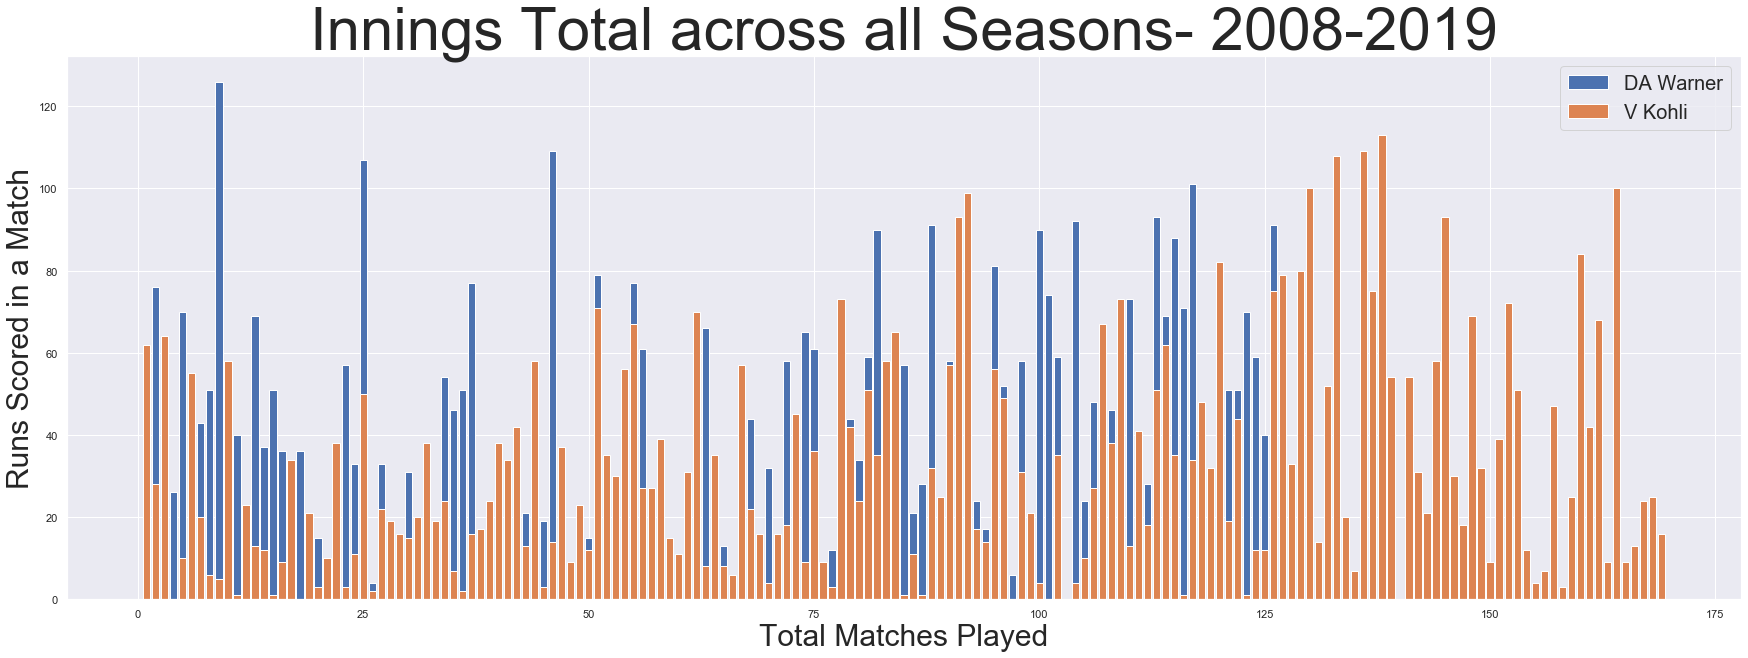

In [43]:
batsman_list_req=['DA Warner','V Kohli']
batsman=deliveries_data[deliveries_data.batsman.isin(batsman_list_req)]
batsman_run=batsman.groupby(['match_id','batsman']).apply(lambda x:np.sum(x['batsman_runs'])).reset_index(name='Runs')
plt.figure(figsize=(30,10))
for name in batsman_list_req:
    batsman_check=batsman_run[batsman_run.batsman==name]
    batsman_check.index = np.arange(1, len(batsman_check) + 1)
    x=batsman_check.index
    y=batsman_check.Runs
    plt.bar(x,y)
plt.legend(batsman_list_req,prop={'size':20})
plt.title("Innings Total across all Seasons- 2008-2019",fontsize=60)
plt.xlabel("Total Matches Played",fontsize=30)
plt.ylabel("Runs Scored in a Match",fontsize=30)
plt.show()

#### Wickets taken by bowler across all seasons

In [44]:
a=deliveries_data.copy()
a["player_dismissed"]=a["player_dismissed"].notnull()

In [45]:
for i in range(0,179078):
    if a["player_dismissed"].loc[i]==True:
        a["player_dismissed"].loc[i]==1

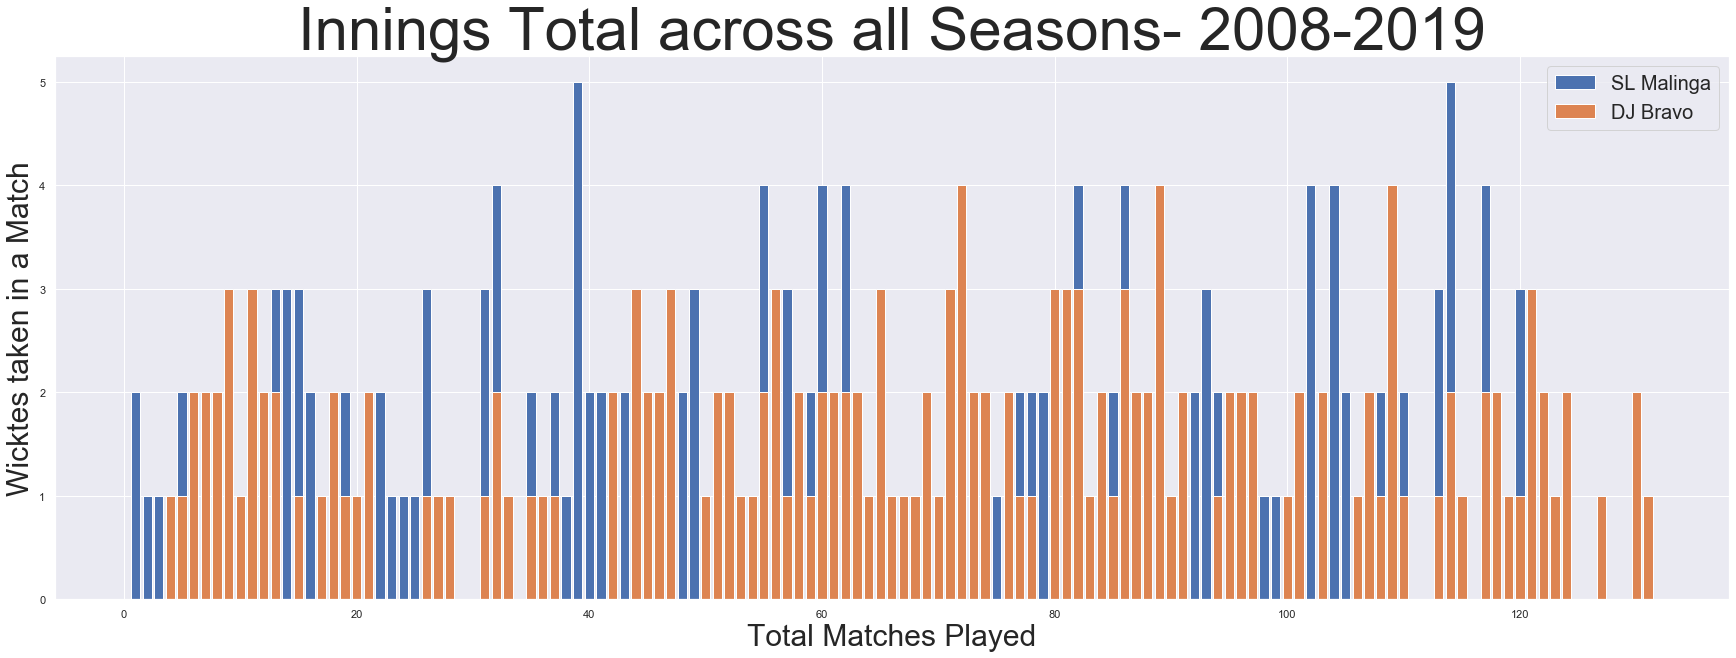

In [46]:
bowler_list_req=['SL Malinga','DJ Bravo']
bowler=a[a.bowler.isin(bowler_list_req)]
bowler_wicket=bowler.groupby(['match_id','bowler']).apply(lambda x:np.sum(x['player_dismissed'])).reset_index(name='Wickets')
plt.figure(figsize=(30,10))
for name in bowler_list_req:
    bowler_check=bowler_wicket[bowler_wicket.bowler==name]
    bowler_check.index = np.arange(1, len(bowler_check) + 1)
    x=bowler_check.index
    y=bowler_check.Wickets
    plt.bar(x,y)
plt.legend(bowler_list_req,prop={'size':20})
plt.title("Innings Total across all Seasons- 2008-2019",fontsize=60)
plt.xlabel("Total Matches Played",fontsize=30)
plt.ylabel("Wicktes taken in a Match",fontsize=30)
plt.show()

### Cleaning the Dataset

In [47]:
deliveries_data.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [48]:
columns_to_remove=["batsman","non_striker",'bowler', 'is_super_over','wide_runs','bye_runs','legbye_runs','noball_runs', 
                   'penalty_runs','batsman_runs', 'extra_runs','dismissal_kind', 'fielder']

In [49]:
deliveries_data.drop(labels=columns_to_remove,axis=1,inplace=True)

In [50]:
deliveries_data.head(10)
temp=deliveries_data[["match_id","inning","total_runs"]]
temp.head()
temp=temp.groupby(["match_id","inning"]).sum()
temp=temp.rename(columns={"total_runs":"total"})
deliveries_data=deliveries_data.merge(temp,on=["match_id","inning"])

In [51]:
deliveries_data[deliveries_data["match_id"]>636]["match_id"].unique()

array([ 7894,  7895,  7896,  7897,  7898,  7899,  7900,  7901,  7902,
        7903,  7904,  7905,  7906,  7907,  7908,  7909,  7910,  7911,
        7912,  7913,  7914,  7915,  7916,  7917,  7918,  7919,  7920,
        7921,  7922,  7923,  7924,  7925,  7926,  7927,  7928,  7929,
        7930,  7931,  7932,  7933,  7934,  7935,  7936,  7937,  7938,
        7939,  7940,  7941,  7942,  7943,  7944,  7945,  7946,  7947,
        7948,  7949,  7950,  7951,  7952,  7953, 11137, 11138, 11139,
       11140, 11141, 11142, 11143, 11144, 11145, 11146, 11147, 11148,
       11149, 11150, 11151, 11152, 11153, 11309, 11310, 11311, 11312,
       11313, 11314, 11315, 11316, 11317, 11318, 11319, 11320, 11321,
       11322, 11323, 11324, 11325, 11326, 11327, 11328, 11329, 11330,
       11331, 11332, 11333, 11334, 11335, 11336, 11337, 11338, 11339,
       11340, 11341, 11342, 11343, 11344, 11345, 11346, 11347, 11412,
       11413, 11414, 11415], dtype=int64)

In [52]:
a=636
for i in range(7894,11416):
    if i in deliveries_data[deliveries_data["match_id"]>636]["match_id"].unique():
        a=a+1
    deliveries_data["match_id"].replace(i,a,inplace=True)

In [53]:
deliveries_data[deliveries_data["match_id"]>636]["match_id"].unique()

array([637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 647, 648, 649,
       650, 651, 652, 653, 654, 655, 656, 657, 658, 659, 660, 661, 662,
       663, 664, 665, 666, 667, 668, 669, 670, 671, 672, 673, 674, 675,
       676, 677, 678, 679, 680, 681, 682, 683, 684, 685, 686, 687, 688,
       689, 690, 691, 692, 693, 694, 695, 696, 697, 698, 699, 700, 701,
       702, 703, 704, 705, 706, 707, 708, 709, 710, 711, 712, 713, 714,
       715, 716, 717, 718, 719, 720, 721, 722, 723, 724, 725, 726, 727,
       728, 729, 730, 731, 732, 733, 734, 735, 736, 737, 738, 739, 740,
       741, 742, 743, 744, 745, 746, 747, 748, 749, 750, 751, 752, 753,
       754, 755, 756], dtype=int64)

In [54]:
deliveries_data["batting_team"].unique()

array(['Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Mumbai Indians', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [55]:
deliveries_data.replace('Delhi Daredevils','Delhi Capitals',inplace = True)
deliveries_data.replace('Rising Pune Supergiant','Rising Pune Supergiants',inplace = True)

In [56]:
for i in range(0,179078):
    deliveries_data["current_score"]=0

In [57]:
a=0
b=0
for i in range(0,179078):
    if(deliveries_data["inning"].iloc[i]==1):
        a=a+deliveries_data["total_runs"].iloc[i]
        deliveries_data["current_score"].iloc[i]=a
        b=0
    else:
        b=b+deliveries_data["total_runs"].iloc[i]
        deliveries_data["current_score"].iloc[i]=b
        a=0

In [58]:
deliveries_data.drop(labels=["total_runs"],axis=1,inplace=True)

In [59]:
deliveries_data.tail()

match_id  inning         batting_team    bowling_team  over  ball  \
179073       756       2  Chennai Super Kings  Mumbai Indians    20     2   
179074       756       2  Chennai Super Kings  Mumbai Indians    20     3   
179075       756       2  Chennai Super Kings  Mumbai Indians    20     4   
179076       756       2  Chennai Super Kings  Mumbai Indians    20     5   
179077       756       2  Chennai Super Kings  Mumbai Indians    20     6   

       player_dismissed  total  current_score  
179073              NaN    157            152  
179074              NaN    157            154  
179075        SR Watson    157            155  
179076              NaN    157            157  
179077        SN Thakur    157            157

In [60]:
deliveries_data["player_dismissed"]=deliveries_data["player_dismissed"].fillna(0)

In [61]:
a=0
b=0
for i in range(0,179078):
    if(deliveries_data["inning"].iloc[i]==1):
        b=0
        if(deliveries_data["player_dismissed"].iloc[i]!=0):
            a=a+1
            deliveries_data["player_dismissed"].iloc[i]=a
        else:
            deliveries_data["player_dismissed"].iloc[i]=a
    else:
        a=0
        if(deliveries_data["player_dismissed"].iloc[i]!=0):
            b=b+1
            deliveries_data["player_dismissed"].iloc[i]=b
        else:
            deliveries_data["player_dismissed"].iloc[i]=b

### Merging the two Datasets

In [62]:
df=matches_data.merge(deliveries_data,on="match_id")

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179078 entries, 0 to 179077
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   match_id          179078 non-null  int64         
 1   season            179078 non-null  int64         
 2   date              179078 non-null  datetime64[ns]
 3   toss_winner       179078 non-null  object        
 4   toss_decision     179078 non-null  object        
 5   winner            179078 non-null  object        
 6   win_by_runs       179078 non-null  int64         
 7   win_by_wickets    179078 non-null  int64         
 8   venue             179078 non-null  object        
 9   inning            179078 non-null  int64         
 10  batting_team      179078 non-null  object        
 11  bowling_team      179078 non-null  object        
 12  over              179078 non-null  int64         
 13  ball              179078 non-null  int64         
 14  play

In [64]:
df.describe()

match_id         season    win_by_runs  win_by_wickets  \
count  179078.000000  179078.000000  179078.000000   179078.000000   
mean      378.714476    2013.444510      13.404036        3.261579   
std       217.977732       3.363947      23.261007        3.347033   
min         1.000000    2008.000000       0.000000        0.000000   
25%       190.000000    2011.000000       0.000000        0.000000   
50%       379.000000    2013.000000       0.000000        3.000000   
75%       567.000000    2016.000000      19.000000        6.000000   
max       756.000000    2019.000000     146.000000       10.000000   

              inning           over           ball          total  \
count  179078.000000  179078.000000  179078.000000  179078.000000   
mean        1.482952      10.162488       3.615587     157.575878   
std         0.502074       5.677684       1.806966      30.449631   
min         1.000000       1.000000       1.000000       2.000000   
25%         1.000000       5.000000       2.000000     138.000000   
50%         1.000000      10.000000       4.000000     159.000000   
75%         2.000000      15.000000       5.000000     179.000000   
max         5.000000      20.000000       9.000000     263.000000   

       current_score  
count  179078.000000  
mean       74.752622  
std        48.528793  
min         0.000000  
25%        35.000000  
50%        70.000000  
75%       110.000000  
max       334.000000

In [65]:
df.columns

Index(['match_id', 'season', 'date', 'toss_winner', 'toss_decision', 'winner',
       'win_by_runs', 'win_by_wickets', 'venue', 'inning', 'batting_team',
       'bowling_team', 'over', 'ball', 'player_dismissed', 'total',
       'current_score'],
      dtype='object')

In [66]:
df=df.sort_values(by=["date","inning"])

In [67]:
df=df.reset_index()

In [68]:
df=df.rename(columns={"player_dismissed":"wickets"})
df.head()

index  match_id  season       date                  toss_winner  \
0  13862        60    2008 2008-04-18  Royal Challengers Bangalore   
1  13863        60    2008 2008-04-18  Royal Challengers Bangalore   
2  13864        60    2008 2008-04-18  Royal Challengers Bangalore   
3  13865        60    2008 2008-04-18  Royal Challengers Bangalore   
4  13866        60    2008 2008-04-18  Royal Challengers Bangalore   

  toss_decision                 winner  win_by_runs  win_by_wickets  \
0         field  Kolkata Knight Riders          140               0   
1         field  Kolkata Knight Riders          140               0   
2         field  Kolkata Knight Riders          140               0   
3         field  Kolkata Knight Riders          140               0   
4         field  Kolkata Knight Riders          140               0   

                   venue  inning           batting_team  \
0  M Chinnaswamy Stadium       1  Kolkata Knight Riders   
1  M Chinnaswamy Stadium       1  Kolkata Knight Riders   
2  M Chinnaswamy Stadium       1  Kolkata Knight Riders   
3  M Chinnaswamy Stadium       1  Kolkata Knight Riders   
4  M Chinnaswamy Stadium       1  Kolkata Knight Riders   

                  bowling_team  over  ball wickets  total  current_score  
0  Royal Challengers Bangalore     1     1       0    222              1  
1  Royal Challengers Bangalore     1     2       0    222              1  
2  Royal Challengers Bangalore     1     3       0    222              2  
3  Royal Challengers Bangalore     1     4       0    222              2  
4  Royal Challengers Bangalore     1     5       0    222              2

In [69]:
df=df[["date","venue",'inning', 'toss_winner','toss_decision','batting_team', 'bowling_team','over', 'ball', 'current_score',"wickets",
       "total", 'win_by_runs','win_by_wickets', 'winner']]

In [70]:
df.to_csv("ipl.csv")

### Understanding the IPL Dataset

In [71]:
ipl=pd.read_csv("ipl.csv",index_col=0,parse_dates=["date"])
ipl.head()

date                  venue  inning                  toss_winner  \
0 2008-04-18  M Chinnaswamy Stadium       1  Royal Challengers Bangalore   
1 2008-04-18  M Chinnaswamy Stadium       1  Royal Challengers Bangalore   
2 2008-04-18  M Chinnaswamy Stadium       1  Royal Challengers Bangalore   
3 2008-04-18  M Chinnaswamy Stadium       1  Royal Challengers Bangalore   
4 2008-04-18  M Chinnaswamy Stadium       1  Royal Challengers Bangalore   

  toss_decision           batting_team                 bowling_team  over  \
0         field  Kolkata Knight Riders  Royal Challengers Bangalore     1   
1         field  Kolkata Knight Riders  Royal Challengers Bangalore     1   
2         field  Kolkata Knight Riders  Royal Challengers Bangalore     1   
3         field  Kolkata Knight Riders  Royal Challengers Bangalore     1   
4         field  Kolkata Knight Riders  Royal Challengers Bangalore     1   

   ball  current_score  wickets  total  win_by_runs  win_by_wickets  \
0     1              1        0    222          140               0   
1     2              1        0    222          140               0   
2     3              2        0    222          140               0   
3     4              2        0    222          140               0   
4     5              2        0    222          140               0   

                  winner  
0  Kolkata Knight Riders  
1  Kolkata Knight Riders  
2  Kolkata Knight Riders  
3  Kolkata Knight Riders  
4  Kolkata Knight Riders

In [72]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179078 entries, 0 to 179077
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   date            179078 non-null  datetime64[ns]
 1   venue           179078 non-null  object        
 2   inning          179078 non-null  int64         
 3   toss_winner     179078 non-null  object        
 4   toss_decision   179078 non-null  object        
 5   batting_team    179078 non-null  object        
 6   bowling_team    179078 non-null  object        
 7   over            179078 non-null  int64         
 8   ball            179078 non-null  int64         
 9   current_score   179078 non-null  int64         
 10  wickets         179078 non-null  int64         
 11  total           179078 non-null  int64         
 12  win_by_runs     179078 non-null  int64         
 13  win_by_wickets  179078 non-null  int64         
 14  winner          179078 non-null  obj

In [73]:
ipl.describe()

inning           over           ball  current_score  \
count  179078.000000  179078.000000  179078.000000  179078.000000   
mean        1.482952      10.162488       3.615587      74.752622   
std         0.502074       5.677684       1.806966      48.528793   
min         1.000000       1.000000       1.000000       0.000000   
25%         1.000000       5.000000       2.000000      35.000000   
50%         1.000000      10.000000       4.000000      70.000000   
75%         2.000000      15.000000       5.000000     110.000000   
max         5.000000      20.000000       9.000000     334.000000   

             wickets          total    win_by_runs  win_by_wickets  
count  179078.000000  179078.000000  179078.000000   179078.000000  
mean        2.435966     157.575878      13.404036        3.261579  
std         2.084691      30.449631      23.261007        3.347033  
min         0.000000       2.000000       0.000000        0.000000  
25%         1.000000     138.000000       0.000000        0.000000  
50%         2.000000     159.000000       0.000000        3.000000  
75%         4.000000     179.000000      19.000000        6.000000  
max        13.000000     263.000000     146.000000       10.000000

In [74]:
ipl["batting_team"].unique()

array(['Kolkata Knight Riders', 'Royal Challengers Bangalore',
       'Chennai Super Kings', 'Rajasthan Royals', 'Kings XI Punjab',
       'Delhi Capitals', 'Mumbai Indians', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions'], dtype=object)

In [75]:
#Keeping only consistent teams
consistent_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
                    'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
                    'Delhi Capitals', 'Sunrisers Hyderabad']

In [76]:
ipl = ipl[(ipl['batting_team'].isin(consistent_teams)) & (ipl['bowling_team'].isin(consistent_teams))]

In [77]:
ipl["venue"].unique()

array(['M Chinnaswamy Stadium',
       'Punjab Cricket Association Stadium, Mohali', 'Feroz Shah Kotla',
       'Wankhede Stadium', 'Sawai Mansingh Stadium',
       'MA Chidambaram Stadium, Chepauk', 'Eden Gardens',
       'Dr DY Patil Sports Academy', 'Newlands', "St George's Park",
       'Kingsmead', 'SuperSport Park', 'Buffalo Park',
       'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera',
       'Himachal Pradesh Cricket Association Stadium',
       'Subrata Roy Sahara Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Sheikh Zayed Stadium',
       'Sharjah Cricket Stadium', 'Dubai International Cricket Stadium',
       'Barabati Stadium', 'Maharashtra Cricket Association Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Punjab Cricket Association IS Bi

In [78]:
ipl.replace('M Chinnaswamy Stadium','M. Chinnaswamy Stadium')
ipl.replace('M. A. Chidambaram Stadium','MA Chidambaram Stadium, Chepauk')
ipl.replace('Feroz Shah Kotla','Feroz Shah Kotla Ground')
ipl.replace('Rajiv Gandhi Intl. Cricket Stadium','Rajiv Gandhi International Stadium, Uppal')
ipl.replace('IS Bindra Stadium','Punjab Cricket Association IS Bindra Stadium, Mohali')

date                               venue  inning  \
0      2008-04-18               M Chinnaswamy Stadium       1   
1      2008-04-18               M Chinnaswamy Stadium       1   
2      2008-04-18               M Chinnaswamy Stadium       1   
3      2008-04-18               M Chinnaswamy Stadium       1   
4      2008-04-18               M Chinnaswamy Stadium       1   
...           ...                                 ...     ...   
179073 2019-12-05  Rajiv Gandhi Intl. Cricket Stadium       2   
179074 2019-12-05  Rajiv Gandhi Intl. Cricket Stadium       2   
179075 2019-12-05  Rajiv Gandhi Intl. Cricket Stadium       2   
179076 2019-12-05  Rajiv Gandhi Intl. Cricket Stadium       2   
179077 2019-12-05  Rajiv Gandhi Intl. Cricket Stadium       2   

                        toss_winner toss_decision           batting_team  \
0       Royal Challengers Bangalore         field  Kolkata Knight Riders   
1       Royal Challengers Bangalore         field  Kolkata Knight Riders   
2       Royal Challengers Bangalore         field  Kolkata Knight Riders   
3       Royal Challengers Bangalore         field  Kolkata Knight Riders   
4       Royal Challengers Bangalore         field  Kolkata Knight Riders   
...                             ...           ...                    ...   
179073               Mumbai Indians           bat    Chennai Super Kings   
179074               Mumbai Indians           bat    Chennai Super Kings   
179075               Mumbai Indians           bat    Chennai Super Kings   
179076               Mumbai Indians           bat    Chennai Super Kings   
179077               Mumbai Indians           bat    Chennai Super Kings   

                       bowling_team  over  ball  current_score  wickets  \
0       Royal Challengers Bangalore     1     1              1        0   
1       Royal Challengers Bangalore     1     2              1        0   
2       Royal Challengers Bangalore     1     3              2        0   
3       Royal Challengers Bangalore     1     4              2        0   
4       Royal Challengers Bangalore     1     5              2        0   
...                             ...   ...   ...            ...      ...   
179073               Mumbai Indians    20     2            152        5   
179074               Mumbai Indians    20     3            154        5   
179075               Mumbai Indians    20     4            155        6   
179076               Mumbai Indians    20     5            157        6   
179077               Mumbai Indians    20     6            157        7   

        total  win_by_runs  win_by_wickets                 winner  
0         222          140               0  Kolkata Knight Riders  
1         222          140               0  Kolkata Knight Riders  
2         222          140               0  Kolkata Knight Riders  
3         222          140               0  Kolkata Knight Riders  
4         222          140               0  Kolkata Knight Riders  
...       ...          ...             ...                    ...  
179073    157            1               0         Mumbai Indians  
179074    157            1               0         Mumbai Indians  
179075    157            1               0         Mumbai Indians  
179076    157            1               0         Mumbai Indians  
179077    157            1               0         Mumbai Indians  

[135185 rows x 15 columns]

In [79]:
#Keeping only consistent venues
consistent_venues=["Eden Gardens",'M. Chinnaswamy Stadium','Sawai Mansingh Stadium','Wankhede Stadium', 
                   'Punjab Cricket Association IS Bindra Stadium, Mohali','MA Chidambaram Stadium, Chepauk',
                   'Feroz Shah Kotla Ground','Rajiv Gandhi International Stadium, Uppal']

In [80]:
ipl = ipl[ipl['venue'].isin(consistent_venues)]

In [81]:
ipl.head()

date             venue  inning     toss_winner toss_decision  \
692 2008-04-20  Wankhede Stadium       1  Mumbai Indians           bat   
693 2008-04-20  Wankhede Stadium       1  Mumbai Indians           bat   
694 2008-04-20  Wankhede Stadium       1  Mumbai Indians           bat   
695 2008-04-20  Wankhede Stadium       1  Mumbai Indians           bat   
696 2008-04-20  Wankhede Stadium       1  Mumbai Indians           bat   

       batting_team                 bowling_team  over  ball  current_score  \
692  Mumbai Indians  Royal Challengers Bangalore     1     1              0   
693  Mumbai Indians  Royal Challengers Bangalore     1     2              4   
694  Mumbai Indians  Royal Challengers Bangalore     1     3              4   
695  Mumbai Indians  Royal Challengers Bangalore     1     4              4   
696  Mumbai Indians  Royal Challengers Bangalore     1     5              8   

     wickets  total  win_by_runs  win_by_wickets                       winner  
692        0    165            0               5  Royal Challengers Bangalore  
693        0    165            0               5  Royal Challengers Bangalore  
694        0    165            0               5  Royal Challengers Bangalore  
695        0    165            0               5  Royal Challengers Bangalore  
696        0    165            0               5  Royal Challengers Bangalore

### Exploratory Data Analysis

(8.0, 0.0)

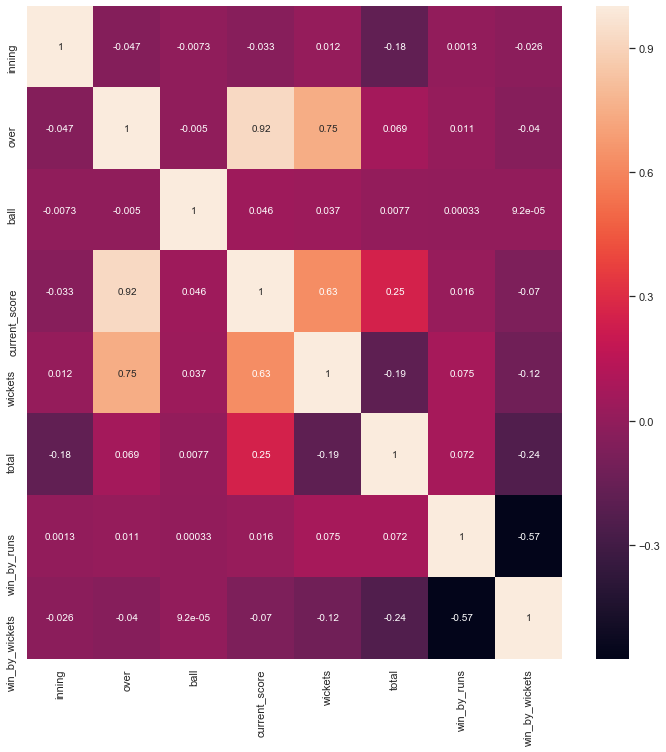

In [82]:
mpl.rcParams["figure.figsize"]=(12,12)
ax=sns.heatmap(ipl.corr(),annot=True)
bottom,top=ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)

### Model Building (Only for First Innings)

In [83]:
ipl = ipl[ipl['over']>5]
ipl = ipl[ipl['inning']==1]

In [84]:
ipl.head()

date             venue  inning     toss_winner toss_decision  \
724 2008-04-20  Wankhede Stadium       1  Mumbai Indians           bat   
725 2008-04-20  Wankhede Stadium       1  Mumbai Indians           bat   
726 2008-04-20  Wankhede Stadium       1  Mumbai Indians           bat   
727 2008-04-20  Wankhede Stadium       1  Mumbai Indians           bat   
728 2008-04-20  Wankhede Stadium       1  Mumbai Indians           bat   

       batting_team                 bowling_team  over  ball  current_score  \
724  Mumbai Indians  Royal Challengers Bangalore     6     1             42   
725  Mumbai Indians  Royal Challengers Bangalore     6     2             46   
726  Mumbai Indians  Royal Challengers Bangalore     6     3             46   
727  Mumbai Indians  Royal Challengers Bangalore     6     4             46   
728  Mumbai Indians  Royal Challengers Bangalore     6     5             47   

     wickets  total  win_by_runs  win_by_wickets                       winner  
724        2    165            0               5  Royal Challengers Bangalore  
725        2    165            0               5  Royal Challengers Bangalore  
726        2    165            0               5  Royal Challengers Bangalore  
727        3    165            0               5  Royal Challengers Bangalore  
728        3    165            0               5  Royal Challengers Bangalore

In [86]:
ipl=ipl.drop(labels=["inning","winner","win_by_runs","win_by_wickets"],axis=1)

In [87]:
# Converting categorical features using OneHotEncoding method
encoded_ipl = pd.get_dummies(data=ipl, columns=['batting_team', 'bowling_team', "venue", "toss_winner","toss_decision"])

In [88]:
encoded_ipl.head()

date  over  ball  current_score  wickets  total  \
724 2008-04-20     6     1             42        2    165   
725 2008-04-20     6     2             46        2    165   
726 2008-04-20     6     3             46        2    165   
727 2008-04-20     6     4             46        3    165   
728 2008-04-20     6     5             47        3    165   

     batting_team_Chennai Super Kings  batting_team_Delhi Capitals  \
724                                 0                            0   
725                                 0                            0   
726                                 0                            0   
727                                 0                            0   
728                                 0                            0   

     batting_team_Kings XI Punjab  batting_team_Kolkata Knight Riders  ...  \
724                             0                                   0  ...   
725                             0                                   0  ...   
726                             0                                   0  ...   
727                             0                                   0  ...   
728                             0                                   0  ...   

     toss_winner_Chennai Super Kings  toss_winner_Delhi Capitals  \
724                                0                           0   
725                                0                           0   
726                                0                           0   
727                                0                           0   
728                                0                           0   

     toss_winner_Kings XI Punjab  toss_winner_Kolkata Knight Riders  \
724                            0                                  0   
725                            0                                  0   
726                            0                                  0   
727                            0                                  0   
728                            0                                  0   

     toss_winner_Mumbai Indians  toss_winner_Rajasthan Royals  \
724                           1                             0   
725                           1                             0   
726                           1                             0   
727                           1                             0   
728                           1                             0   

     toss_winner_Royal Challengers Bangalore  toss_winner_Sunrisers Hyderabad  \
724                                        0                                0   
725                                        0                                0   
726                                        0                                0   
727                                        0                                0   
728                                        0                                0   

     toss_decision_bat  toss_decision_field  
724                  1                    0  
725                  1                    0  
726                  1                    0  
727                  1                    0  
728                  1                    0  

[5 rows x 40 columns]

In [89]:
encoded_ipl.columns

Index(['date', 'over', 'ball', 'current_score', 'wickets', 'total',
       'batting_team_Chennai Super Kings', 'batting_team_Delhi Capitals',
       'batting_team_Kings XI Punjab', 'batting_team_Kolkata Knight Riders',
       'batting_team_Mumbai Indians', 'batting_team_Rajasthan Royals',
       'batting_team_Royal Challengers Bangalore',
       'batting_team_Sunrisers Hyderabad', 'bowling_team_Chennai Super Kings',
       'bowling_team_Delhi Capitals', 'bowling_team_Kings XI Punjab',
       'bowling_team_Kolkata Knight Riders', 'bowling_team_Mumbai Indians',
       'bowling_team_Rajasthan Royals',
       'bowling_team_Royal Challengers Bangalore',
       'bowling_team_Sunrisers Hyderabad', 'venue_Eden Gardens',
       'venue_Feroz Shah Kotla Ground', 'venue_M. Chinnaswamy Stadium',
       'venue_MA Chidambaram Stadium, Chepauk',
       'venue_Punjab Cricket Association IS Bindra Stadium, Mohali',
       'venue_Rajiv Gandhi International Stadium, Uppal',
       'venue_Sawai Mansingh St

In [90]:
encoded_ipl=encoded_ipl[["date",'venue_Eden Gardens','venue_Feroz Shah Kotla Ground', 'venue_M. Chinnaswamy Stadium',
                         'venue_MA Chidambaram Stadium, Chepauk','venue_Punjab Cricket Association IS Bindra Stadium, Mohali',
                         'venue_Rajiv Gandhi International Stadium, Uppal','venue_Sawai Mansingh Stadium',
                         'venue_Wankhede Stadium','batting_team_Chennai Super Kings','batting_team_Delhi Capitals', 
                       'batting_team_Kings XI Punjab','batting_team_Kolkata Knight Riders', 'batting_team_Mumbai Indians',
                       'batting_team_Rajasthan Royals','batting_team_Royal Challengers Bangalore','batting_team_Sunrisers Hyderabad',
                       'bowling_team_Chennai Super Kings','bowling_team_Delhi Capitals', 'bowling_team_Kings XI Punjab',
                       'bowling_team_Kolkata Knight Riders', 'bowling_team_Mumbai Indians','bowling_team_Rajasthan Royals',
                       'bowling_team_Royal Challengers Bangalore','bowling_team_Sunrisers Hyderabad','toss_winner_Chennai Super Kings', 
                       'toss_winner_Delhi Capitals','toss_winner_Kings XI Punjab', 'toss_winner_Kolkata Knight Riders',
                       'toss_winner_Mumbai Indians', 'toss_winner_Rajasthan Royals','toss_winner_Royal Challengers Bangalore',
                       'toss_winner_Sunrisers Hyderabad','toss_decision_bat','toss_decision_field',
                       'over', 'ball', 'current_score','wickets','total']]

In [91]:
encoded_ipl.head()

date  venue_Eden Gardens  venue_Feroz Shah Kotla Ground  \
724 2008-04-20                   0                              0   
725 2008-04-20                   0                              0   
726 2008-04-20                   0                              0   
727 2008-04-20                   0                              0   
728 2008-04-20                   0                              0   

     venue_M. Chinnaswamy Stadium  venue_MA Chidambaram Stadium, Chepauk  \
724                             0                                      0   
725                             0                                      0   
726                             0                                      0   
727                             0                                      0   
728                             0                                      0   

     venue_Punjab Cricket Association IS Bindra Stadium, Mohali  \
724                                                  0            
725                                                  0            
726                                                  0            
727                                                  0            
728                                                  0            

     venue_Rajiv Gandhi International Stadium, Uppal  \
724                                                0   
725                                                0   
726                                                0   
727                                                0   
728                                                0   

     venue_Sawai Mansingh Stadium  venue_Wankhede Stadium  \
724                             0                       1   
725                             0                       1   
726                             0                       1   
727                             0                       1   
728                             0                       1   

     batting_team_Chennai Super Kings  ...  toss_winner_Rajasthan Royals  \
724                                 0  ...                             0   
725                                 0  ...                             0   
726                                 0  ...                             0   
727                                 0  ...                             0   
728                                 0  ...                             0   

     toss_winner_Royal Challengers Bangalore  toss_winner_Sunrisers Hyderabad  \
724                                        0                                0   
725                                        0                                0   
726                                        0                                0   
727                                        0                                0   
728                                        0                                0   

     toss_decision_bat  toss_decision_field  over  ball  current_score  \
724                  1                    0     6     1             42   
725                  1                    0     6     2             46   
726                  1                    0     6     3             46   
727                  1                    0     6     4             46   
728                  1                    0     6     5             47   

     wickets  total  
724        2    165  
725        2    165  
726        2    165  
727        3    165  
728        3    165  

[5 rows x 40 columns]

In [92]:
# Splitting the data into train and test set
X_train = encoded_ipl.drop(labels='total', axis=1)[encoded_ipl['date'].dt.year <= 2018]
X_test = encoded_ipl.drop(labels='total', axis=1)[encoded_ipl['date'].dt.year > 2018]

In [93]:
y_train = encoded_ipl[encoded_ipl['date'].dt.year <= 2018]['total'].values
y_test = encoded_ipl[encoded_ipl['date'].dt.year > 2018]['total'].values

In [94]:
# Removing the 'date' column
X_train.drop(labels='date', axis=True, inplace=True)
X_test.drop(labels='date', axis=True, inplace=True)

### Linear Regression

In [95]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [96]:
prediction=regressor.predict(X_test)

In [97]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 16.91425088914728
MSE: 526.9012887079479
RMSE: 22.95433050010276


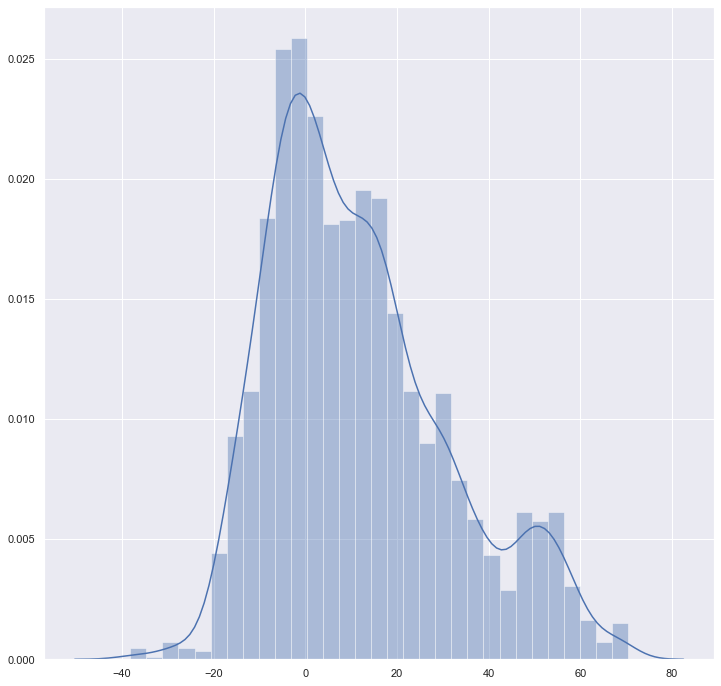

In [98]:
sns.distplot(y_test-prediction)

### Ridge Regression

In [99]:
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [100]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 40}
-525.3009714076732


In [101]:
prediction=ridge_regressor.predict(X_test)

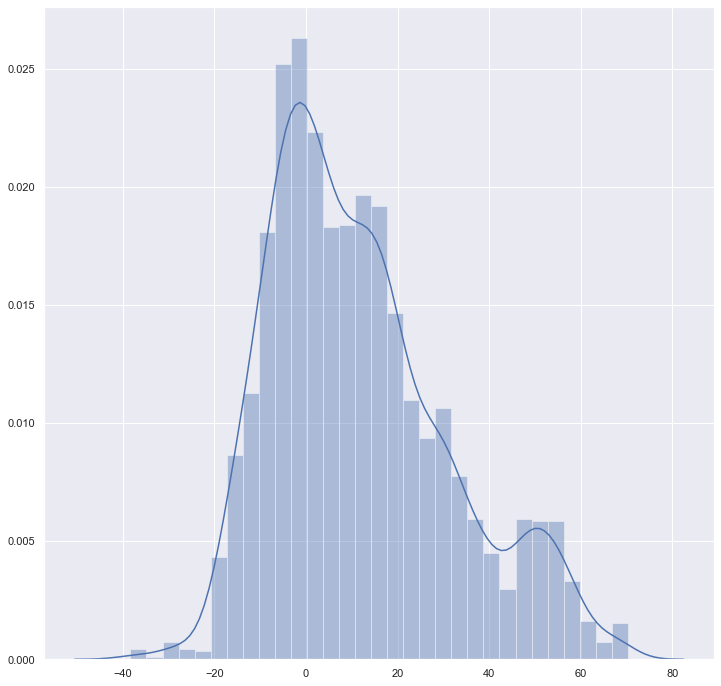

In [102]:
sns.distplot(y_test-prediction)

In [103]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 16.885745596970402
MSE: 524.4176989064983
RMSE: 22.9001680977782


### Lasso Regression

In [104]:
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lasso_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [105]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 1}
-506.66446454748404


In [106]:
prediction=lasso_regressor.predict(X_test)

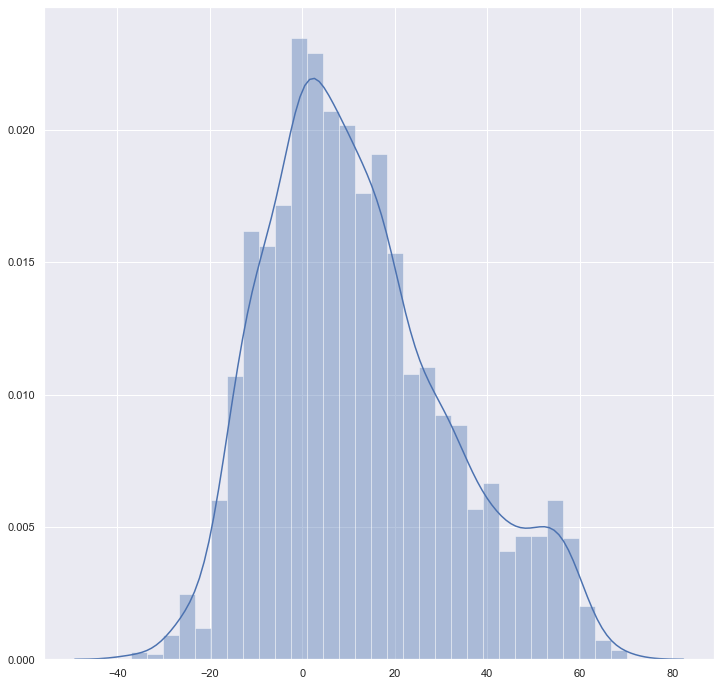

In [107]:
sns.distplot(y_test-prediction)

In [108]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 17.441132923124712
MSE: 537.8118401768253
RMSE: 23.190770581781564


### Decision Tree Regressor 

In [109]:
model=DecisionTreeRegressor(max_depth=8)
model.fit(X_train,y_train)
predict=model.predict(X_test)

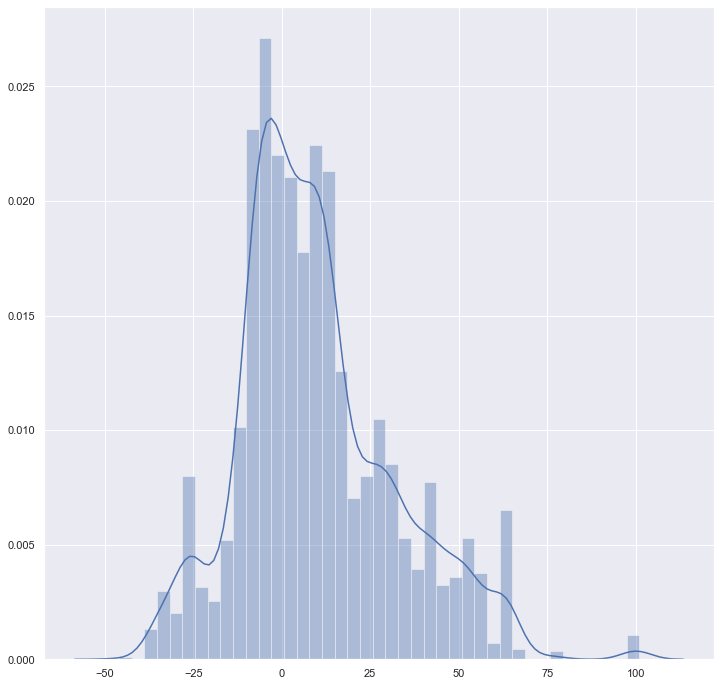

In [110]:
sns.distplot(y_test-predict)

In [111]:
print('MAE:', metrics.mean_absolute_error(y_test, predict))
print('MSE:', metrics.mean_squared_error(y_test, predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predict)))

MAE: 17.4992602983558
MSE: 581.9540520898587
RMSE: 24.12372384375718


### Random Forest Regressor

In [112]:
model=RandomForestRegressor(n_estimators=100,max_depth=8)
model.fit(X_train,y_train)
predict=model.predict(X_test)

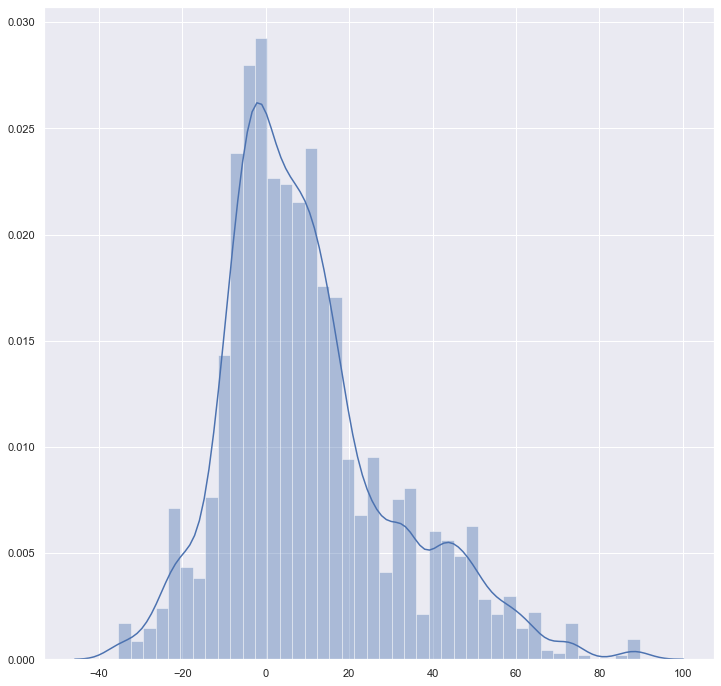

In [113]:
sns.distplot(y_test-predict)

In [114]:
print('MAE:', metrics.mean_absolute_error(y_test, predict))
print('MSE:', metrics.mean_squared_error(y_test, predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predict)))

MAE: 16.18861186237898
MSE: 518.1407073101732
RMSE: 22.762704305731628


### XGBoost Regressor

In [115]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
params = {"objective":"reg:squarederror",'colsample_bytree': 0.8,'learning_rate': 0.1,'max_depth': 15, 'reg_alpha':0.75,'subsample':0.8,'seed':123}

In [116]:
cv_results = xgb.cv(params,dtrain,nfold=5, num_boost_round=50,early_stopping_rounds=10,metrics={"mae"},seed=123)
print(cv_results["test-mae-mean"][49])

4.090044000000001


In [117]:
xg_reg = xgb.train(params, dtrain, num_boost_round=999,evals=[(dtest,"Test")],early_stopping_rounds=10)

[0]	Test-rmse:165.46561
Will train until Test-rmse hasn't improved in 10 rounds.
[1]	Test-rmse:150.18179
[2]	Test-rmse:136.89467
[3]	Test-rmse:124.45336
[4]	Test-rmse:113.54586
[5]	Test-rmse:103.72755
[6]	Test-rmse:94.73869
[7]	Test-rmse:86.68543
[8]	Test-rmse:79.40350
[9]	Test-rmse:72.98264
[10]	Test-rmse:67.14142
[11]	Test-rmse:61.96943
[12]	Test-rmse:57.38329
[13]	Test-rmse:53.28564
[14]	Test-rmse:49.63757
[15]	Test-rmse:46.45868
[16]	Test-rmse:43.75455
[17]	Test-rmse:41.32124
[18]	Test-rmse:39.08525
[19]	Test-rmse:36.97621
[20]	Test-rmse:35.18811
[21]	Test-rmse:33.69677
[22]	Test-rmse:32.27049
[23]	Test-rmse:31.05539
[24]	Test-rmse:30.09226
[25]	Test-rmse:29.14097
[26]	Test-rmse:28.27415
[27]	Test-rmse:27.60223
[28]	Test-rmse:26.94727
[29]	Test-rmse:26.34681
[30]	Test-rmse:25.83567
[31]	Test-rmse:25.38470
[32]	Test-rmse:25.00549
[33]	Test-rmse:24.65280
[34]	Test-rmse:24.36058
[35]	Test-rmse:24.07557
[36]	Test-rmse:23.86192
[37]	Test-rmse:23.64893
[38]	Test-rmse:23.45208
[39]	Test-r

In [118]:
print('MAE:', metrics.mean_absolute_error(xg_reg.predict(dtest), y_test))
print('MSE:', metrics.mean_squared_error(xg_reg.predict(dtest), y_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(xg_reg.predict(dtest), y_test)))

MAE: 15.992378928225738
MSE: 479.26050299912504
RMSE: 21.89201916222268


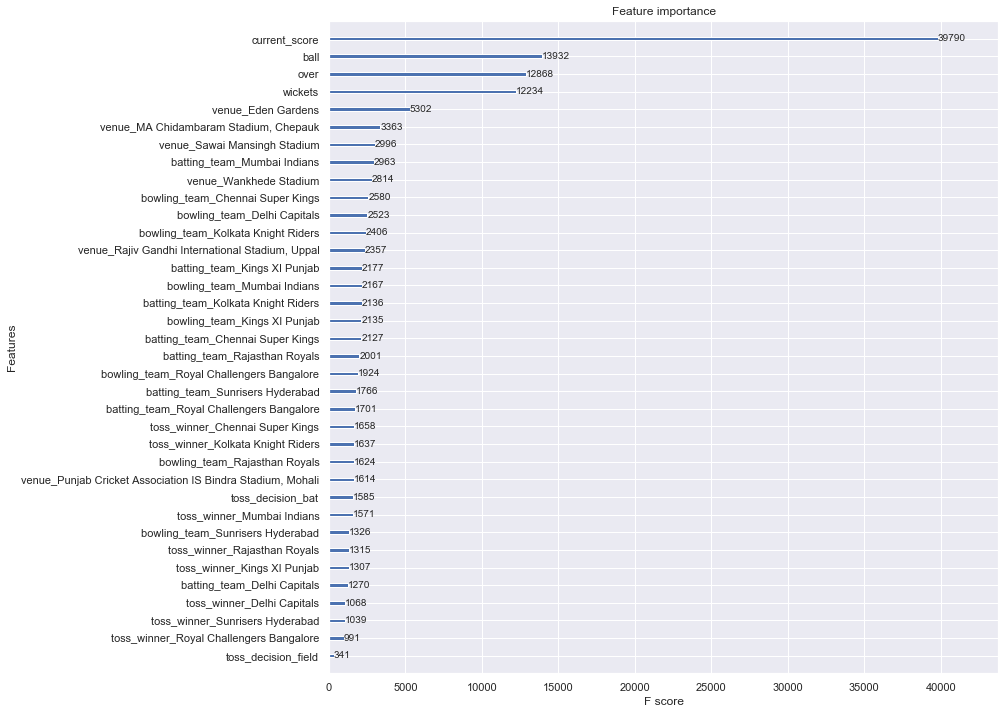

In [119]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [12,12]
plt.show()

In [120]:
'''
parameters_for_testing = {'colsample_bytree':[0.4,0.6,0.8],'gamma':[0,0.03,0.1,0.3],'min_child_weight':[1.5,6,10],
                          'learning_rate':[0.1,0.07],'max_depth':[3,5],'n_estimators':[10000],
                          'reg_alpha':[1e-5, 1e-2,  0.75],'reg_lambda':[1e-5, 1e-2, 0.45],'subsample':[0.6,0.95]}
xgb_model = xgb.XGBRegressor(learning_rate =0.1, n_estimators=1000, max_depth=5,
                                 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
                                 nthread=6, scale_pos_weight=1, seed=27)
gsearch1 = GridSearchCV(estimator = xgb_model, param_grid = parameters_for_testing, n_jobs=6,iid=False, verbose=10,scoring='neg_mean_squared_error')
gsearch1.fit(X_train,y_train)
print (gsearch1.grid_scores_)
print('best params')
print (gsearch1.best_params_)
print('best score')
print (gsearch1.best_score_)
'''

"\nparameters_for_testing = {'colsample_bytree':[0.4,0.6,0.8],'gamma':[0,0.03,0.1,0.3],'min_child_weight':[1.5,6,10],\n                          'learning_rate':[0.1,0.07],'max_depth':[3,5],'n_estimators':[10000],\n                          'reg_alpha':[1e-5, 1e-2,  0.75],'reg_lambda':[1e-5, 1e-2, 0.45],'subsample':[0.6,0.95]}\nxgb_model = xgb.XGBRegressor(learning_rate =0.1, n_estimators=1000, max_depth=5,\n                                 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,\n                                 nthread=6, scale_pos_weight=1, seed=27)\ngsearch1 = GridSearchCV(estimator = xgb_model, param_grid = parameters_for_testing, n_jobs=6,iid=False, verbose=10,scoring='neg_mean_squared_error')\ngsearch1.fit(X_train,y_train)\nprint (gsearch1.grid_scores_)\nprint('best params')\nprint (gsearch1.best_params_)\nprint('best score')\nprint (gsearch1.best_score_)\n"

In [121]:
filename = 'first-innings-score-model.pkl'
pickle.dump(xg_reg, open(filename, 'wb'))